In [7]:
%matplotlib inline

# 592B, Class 11.1 (04/09). Spectral domain methods and representations II

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.signal as signal
from scipy import fftpack

from ipywidgets import interactive
from IPython.display import Audio, display

## Review question: filtering and "translating" to cepstral analysis

Remember this from last week? Here I've chosen a small frequency for `y1` and a higher frequency for `y2`. 

In [39]:
def plot_play_summed_sines(f1 = 50, f2 = 880, t_start = 0, t_stop = 1, fs = 2000, xlim_max = 0.01):
    x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
    y1 = np.sin(2*np.pi*f1*x)
    y2 = np.sin(2*np.pi*f2*x)
    
    plt.xlim(t_start,xlim_max)
    plt.plot(x , y1, "-g", label="y1") 
    plt.plot(x , y2, "-b", label="y2") 
    plt.plot(x , y1 + y2, "-r", label="y1+y2") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Adding up sines") 
    
    display(Audio(data=y1, rate=fs))
    display(Audio(data=y2, rate=fs))
    display(Audio(data=y1+y2, rate=fs))
    
    return (x, y1, y2) #I've added this return line. What does this do?

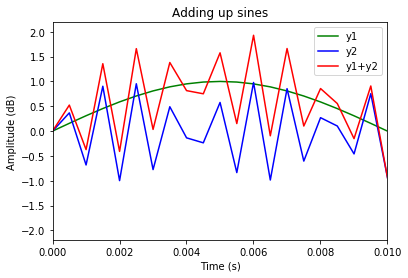

In [51]:
# Uncomment these lines below to get interactive display
#v = interactive(plot_play_summed_sines, f1=(50,100), f2=(300,900), t_start = (0,0), t_stop = (0,5))
#display(v) 

x, y1, y2 = plot_play_summed_sines()

**1. Modify the code to add an additional sinusoidal signal `y3` in, with frequency `f3`. Set the default frequency of `f3` to be 300 Hz.**

**2. Perform a computation so you can separate out and visualize the individual component frequencies contributing to `y1 + y2 + y3`.**

**3. Design and implement filters so that you can separate out: (a) the highest frequency component, (b) the lowest frequency component, (c) the middle frequency componenent. What are these different kinds of filters called?**  *Hint: you may find [this sample code](https://stackoverflow.com/questions/19122157/fft-bandpass-filter-in-python#19124329) helpful.*

## Filters review (from last time)

The code below comes from this tutorial [signal filtering demo](https://www.swharden.com/wp/2009-01-21-signal-filtering-with-python/), lightly edited to remove some code that throws errors for me.

The key point to get from this is to look at how filtering works from a frequency domain perspective, and to also see how that is related to what is going on in the time domain.

In [32]:
xs=np.arange(1,100,.01) #generate Xs (0.00,0.01,0.02,0.03,...,100.0)
signal = sin1=np.sin(xs*.3) #(A)
sin1=np.sin(xs) # (B) sin1
sin2=np.sin(xs*2.33)*.333 # (B) sin2
sin3=np.sin(xs*2.77)*.777 # (B) sin3
noise=sin1+sin2+sin3 # (C)
static = (np.random.random_sample((len(xs)))-.5)*.2 # (D)
sigstat=static+signal # (E)
rawsignal=sigstat+noise # (F)
fft=fftpack.fft(rawsignal) # (G) and (H)
bp=fft[:]
for i in range(len(bp)): # (H-red)
    if i>=10:bp[i]=0
ibp=fftpack.ifft(bp) # (I), (J), (K) and (L)

In [33]:
import pylab # for plotting 

Here's a few of the plots, so we can look at the time domain vs. the frequency domain.

[0, 60, None, None]

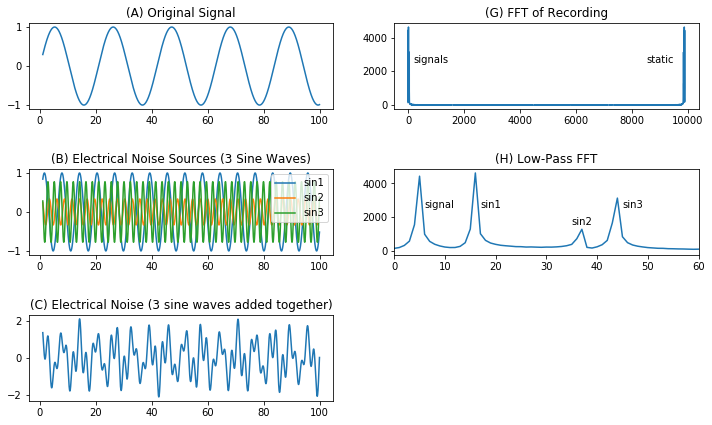

In [34]:
h,w=6,2
pylab.figure(figsize=(12,15))
pylab.subplots_adjust(hspace=.7)

pylab.subplot(h,w,1);pylab.title("(A) Original Signal")
pylab.plot(xs,signal)

pylab.subplot(h,w,3);pylab.title("(B) Electrical Noise Sources (3 Sine Waves)")
pylab.plot(xs,sin1,label="sin1")
pylab.plot(xs,sin2,label="sin2")
pylab.plot(xs,sin3,label="sin3")
pylab.legend()

pylab.subplot(h,w,5);pylab.title("(C) Electrical Noise (3 sine waves added together)")
pylab.plot(xs,noise)

fft=fftpack.fft(rawsignal)
pylab.subplot(h,w,2);pylab.title("(G) FFT of Recording")
pylab.plot(abs(fft))
pylab.text(200,3000,"signals",verticalalignment='top')
pylab.text(9500,3000,"static",verticalalignment='top',
            horizontalalignment='right')

pylab.subplot(h,w,4);pylab.title("(H) Low-Pass FFT")
pylab.plot(abs(fft))
pylab.text(17,3000,"sin1",verticalalignment='top',horizontalalignment='left')
pylab.text(37,2000,"sin2",verticalalignment='top',horizontalalignment='center')
pylab.text(45,3000,"sin3",verticalalignment='top',horizontalalignment='left')
pylab.text(6,3000,"signal",verticalalignment='top',horizontalalignment='left')
#pylab.axvspan(10,10000,fc='r',alpha='.5')
#pylab.axvspan(10,10000,alpha='.5')
pylab.axis([0,60,None,None])

Now here are all of the plots:

/Users/oxbow/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


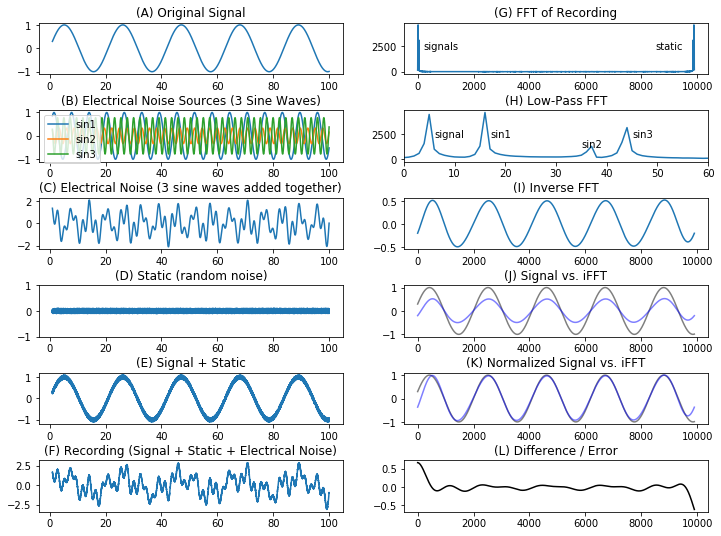

In [49]:
h,w=6,2
pylab.figure(figsize=(12,9))
pylab.subplots_adjust(hspace=.7)
    
pylab.subplot(h,w,1);pylab.title("(A) Original Signal")
pylab.plot(xs,signal)

pylab.subplot(h,w,3);pylab.title("(B) Electrical Noise Sources (3 Sine Waves)")
pylab.plot(xs,sin1,label="sin1")
pylab.plot(xs,sin2,label="sin2")
pylab.plot(xs,sin3,label="sin3")
pylab.legend()

pylab.subplot(h,w,5);pylab.title("(C) Electrical Noise (3 sine waves added together)")
pylab.plot(xs,noise)


pylab.subplot(h,w,7);pylab.title("(D) Static (random noise)")
pylab.plot(xs,static)
pylab.axis([None,None,-1,1])

pylab.subplot(h,w,9);pylab.title("(E) Signal + Static")
pylab.plot(xs,sigstat)

pylab.subplot(h,w,11);pylab.title("(F) Recording (Signal + Static + Electrical Noise)")
pylab.plot(xs,rawsignal)

fft=fftpack.fft(rawsignal)
pylab.subplot(h,w,2);pylab.title("(G) FFT of Recording")
pylab.plot(abs(fft))
pylab.text(200,3000,"signals",verticalalignment='top')
pylab.text(9500,3000,"static",verticalalignment='top',
            horizontalalignment='right')

pylab.subplot(h,w,4);pylab.title("(H) Low-Pass FFT")
pylab.plot(abs(fft))
pylab.text(17,3000,"sin1",verticalalignment='top',horizontalalignment='left')
pylab.text(37,2000,"sin2",verticalalignment='top',horizontalalignment='center')
pylab.text(45,3000,"sin3",verticalalignment='top',horizontalalignment='left')
pylab.text(6,3000,"signal",verticalalignment='top',horizontalalignment='left')
#pylab.axvspan(10,10000,fc='r',alpha='.5')
#pylab.axvspan(10,10000,alpha='.5')
pylab.axis([0,60,None,None])

pylab.subplot(h,w,6);pylab.title("(I) Inverse FFT")
pylab.plot(ibp)

pylab.subplot(h,w,8);pylab.title("(J) Signal vs. iFFT")
pylab.plot(signal,'k',label="signal",alpha=.5)
pylab.plot(ibp,'b',label="ifft",alpha=.5)

pylab.subplot(h,w,10);pylab.title("(K) Normalized Signal vs. iFFT")
pylab.plot(signal/max(signal),'k',label="signal",alpha=.5)
pylab.plot(ibp/max(ibp),'b',label="ifft",alpha=.5)

pylab.subplot(h,w,12);pylab.title("(L) Difference / Error")
pylab.plot(signal/max(signal)-ibp/max(ibp),'k')

## The cepstrum

For this section, we will be using [python_speech_features](https://github.com/jameslyons/python_speech_features) by [James Lyon](https://maxwell.ict.griffith.edu.au/spl/staff/j_lyons/home.htm). Install it using:

```
pip install python_speech_features
```
We can examine the code at the [github repository](https://github.com/jameslyons/python_speech_features) and via the [documentation](https://python-speech-features.readthedocs.io/en/latest/).

James Lyon also has some nice write-ups on the [cepstrum](http://www.practicalcryptography.com/miscellaneous/machine-learning/tutorial-cepstrum-and-lpccs/) and [MFCCs](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/).

In [50]:
import python_speech_features as sf

We'll also be working with the Hmong `mu` sound clip, `hmong_mu.wav`:

In [54]:
(rate,sig) = wavfile.read("hmong_mu.wav")
display(Audio(data=sig, rate=rate))

What we'll be doing now is working through the tutorials using the [github code repository code for `python_speech_features.base.mfcc`](https://python-speech-features.readthedocs.io/en/latest/). This function calls a ton of other sub-functions we'll need to understand in order to figure out how the computation is proceeding. The basic steps are described in the tutorial [here](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/). Let's work through these. 

### Step 1. Frame the signal into short frames.

For this step, we'll need to understand `python_speech_features.sigproc.framesig`.

### Step 2. For each frame calculate the periodogram estimate of the power spectrum.

For this step, we'll need to understand `python_speech_features.sigproc.powspec`.

### Step 3. Apply the mel filterbank to the power spectra, sum the energy in each filter.

For this step, we'll need to understand `python_speech_features.base.fbank`.

### Step 4. Take the logarithm of all filterbank energies.

For this step, we'll need to understand `python_speech_features.base.logfbank`.

### Step 5. Take the DCT of the log filterbank energies.

For this step, we'll need to take a look at `scipy.sig.fftpack.dct`.

### Step 6. Keep DCT coefficients 2-13, discard the rest.

For this step, we'll need to understand `python_speech_features.base.lifter`.